<a href="https://colab.research.google.com/github/PhungTrinhUET/Citrus-leaf-diseases/blob/main/Base_MobileNetV3_small.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip "./gdrive/MyDrive/citrus3.zip" -d '/usr/local'

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /usr/local/data_citrus/black_spot/c_black_spot (705).jpg  
  inflating: /usr/local/data_citrus/black_spot/c_black_spot (706).jpg  
  inflating: /usr/local/data_citrus/black_spot/c_black_spot (707).jpg  
  inflating: /usr/local/data_citrus/black_spot/c_black_spot (708).jpg  
  inflating: /usr/local/data_citrus/black_spot/c_black_spot (709).jpg  
  inflating: /usr/local/data_citrus/black_spot/c_black_spot (710).jpg  
  inflating: /usr/local/data_citrus/black_spot/c_black_spot (711).jpg  
  inflating: /usr/local/data_citrus/black_spot/c_black_spot (712).jpg  
  inflating: /usr/local/data_citrus/black_spot/c_black_spot (713).jpg  
  inflating: /usr/local/data_citrus/black_spot/c_black_spot (714).jpg  
  inflating: /usr/local/data_citrus/black_spot/c_black_spot (715).jpg  
  inflating: /usr/local/data_citrus/black_spot/c_black_spot (716).jpg  
  inflating: /usr/local/data_citrus/black_spot/c_black_spot (717).jpg  
  infla

In [ ]:
# Cell 3: Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import time
import os

In [ ]:
# Cell 4: Load and Split Dataset
batch_size = 64
target_size = (224, 224)
validation_split = 0.2
train_data_dir = '/usr/local/data_citrus/'

train_gen = image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=200,
    image_size=target_size,
    batch_size=batch_size
)

valid_gen = image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=100,
    image_size=target_size,
    batch_size=batch_size
)

# Lấy số lượng lớp đầu ra từ tập dữ liệu
num_classes = len(train_gen.class_names)

Found 5979 files belonging to 5 classes.
Using 4784 files for training.
Found 5979 files belonging to 5 classes.
Using 1195 files for validation.


In [ ]:
# Cell 5: Define the Model with MobileNetV3 Small gốc
base_model = tf.keras.applications.MobileNetV3Small(input_shape=(224, 224, 3),
                                                    include_top=False,
                                                    weights='imagenet')

# Đóng băng các lớp của mô hình gốc
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(num_classes, activation='softmax')  # Số lớp tương ứng với số lượng lớp đầu ra
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

4334752/4334752 [==============================] - 0s 0us/step


In [ ]:
# Cell 6: Train the Model
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=30
)

Epoch 1/30
75/75 [==============================] - 89s 1s/step - loss: 0.6150 - accuracy: 0.8225 - val_loss: 0.2285 - val_accuracy: 0.9448
Epoch 2/30
75/75 [==============================] - 82s 1s/step - loss: 0.1952 - accuracy: 0.9362 - val_loss: 0.1486 - val_accuracy: 0.9523
Epoch 3/30
75/75 [==============================] - 75s 996ms/step - loss: 0.1476 - accuracy: 0.9471 - val_loss: 0.1243 - val_accuracy: 0.9615
Epoch 4/30
75/75 [==============================] - 77s 1s/step - loss: 0.1231 - accuracy: 0.9578 - val_loss: 0.1042 - val_accuracy: 0.9657
Epoch 5/30
75/75 [==============================] - 74s 985ms/step - loss: 0.1090 - accuracy: 0.9624 - val_loss: 0.0916 - val_accuracy: 0.9699
Epoch 6/30
75/75 [==============================] - 71s 944ms/step - loss: 0.0993 - accuracy: 0.9672 - val_loss: 0.0818 - val_accuracy: 0.9707
Epoch 7/30
75/75 [==============================] - 72s 962ms/step - loss: 0.0926 - accuracy: 0.9709 - val_loss: 0.0800 - val_accuracy: 0.9715
Epoch 8/

In [ ]:
# Cell 7: Evaluate the Model
loss, accuracy = model.evaluate(valid_gen)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

19/19 [==============================] - 13s 627ms/step - loss: 0.0421 - accuracy: 0.9874
Validation Loss: 0.0420503243803978
Validation Accuracy: 0.9874476790428162


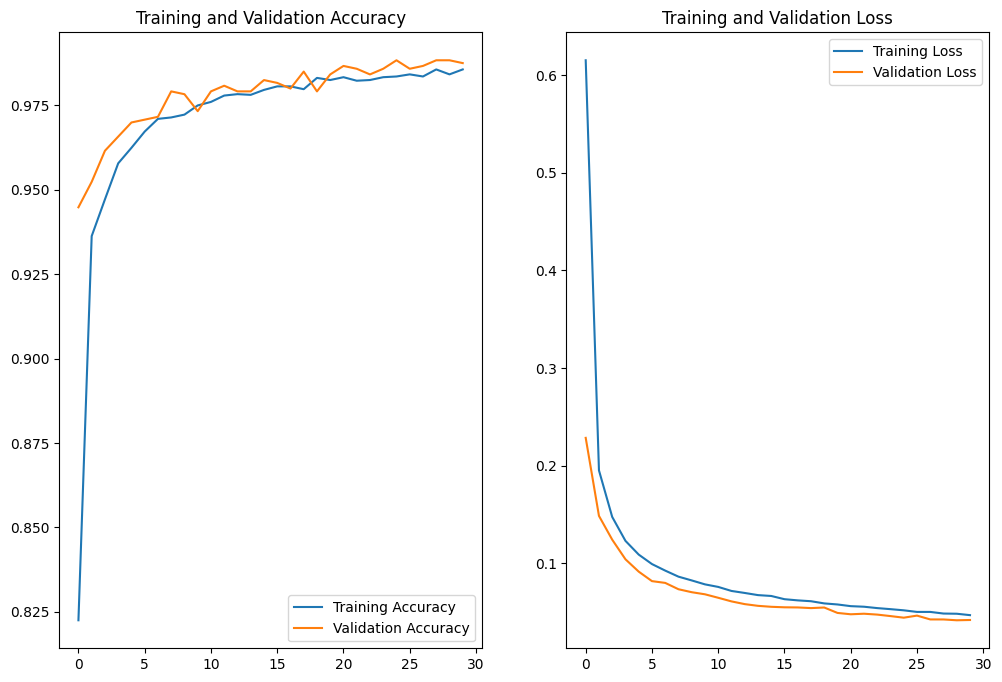

In [ ]:
# Cell 8: Plot Training History
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Cell 9: Save the Model
model.save('/content/gdrive/MyDrive/mobilenetv3_citrus_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Cell 10: Calculate Model Size
model_path = '/content/gdrive/MyDrive/mobilenetv3_citrus_model.h5'
model_size = os.path.getsize(model_path) / (1024 * 1024)
print(f'Model size: {model_size:.2f} MB')

Model size: 3.93 MB


In [ ]:
# Cell 11: Calculate Speed of Single Image Recognition
# Load a single image from the validation set
for images, labels in valid_gen.take(1):
    sample_image = images[0:1]  # Take the first image
    break

# Measure the time for single image recognition
start_time = time.time()
_ = model.predict(sample_image)
end_time = time.time()

inference_time = (end_time - start_time) * 1000  # Convert to milliseconds
print(f'Speed of single image recognition: {inference_time:.2f} ms')

1/1 [==============================] - 1s 1s/step
Speed of single image recognition: 1221.25 ms


2/2 [==============================] - 0s 102ms/step
Precision: 0.987573604685375
Recall: 0.9874476987447699
F1 Score: 0.9874399062324561


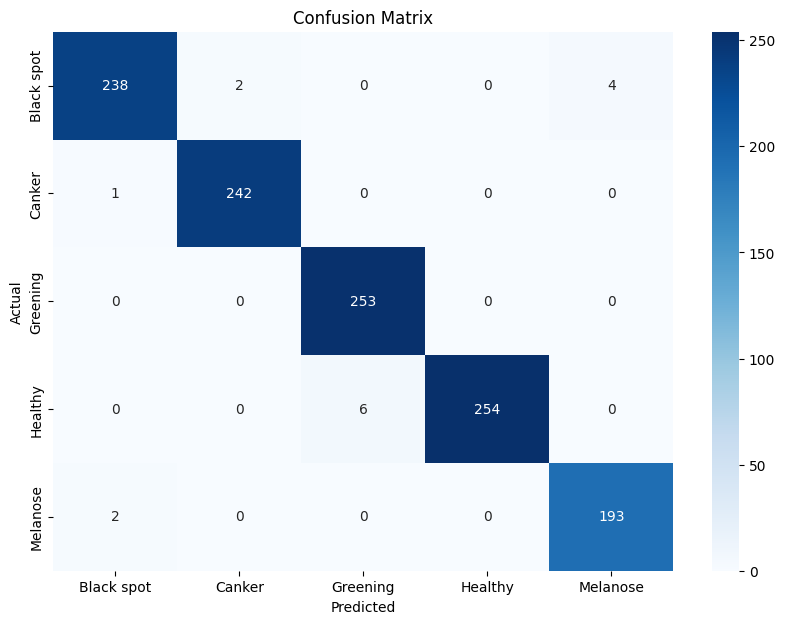

In [ ]:
# Import các thư viện cần thiết
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dự đoán trên tập xác thực
y_true = []
y_pred = []
for images, labels in valid_gen:
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels)

# Tính các chỉ số Precision, Recall, và F1 Score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Tạo confusion matrix
class_labels = ['Black spot', 'Canker', 'Greening', 'Healthy', 'Melanose']
cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Vẽ confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import os
import shutil

def get_model_size(model):
    model.save('temp_model')
    size = sum(os.path.getsize(os.path.join('temp_model', f)) for f in os.listdir('temp_model') if os.path.isfile(os.path.join('temp_model', f)))
    size_mb = size / (1024 * 1024)  # Đổi từ byte sang MB
    shutil.rmtree('temp_model')  # Xóa thư mục tạm thời sau khi tính toán
    return size_mb

model_size_mb = get_model_size(model)
print(f'Model size: {model_size_mb:.2f} MB')


Model size: 3.01 MB


In [ ]:
import time
import numpy as np

def get_inference_time(model, input_shape=(224, 224, 3)):
    input_data = np.random.random([1] + list(input_shape)).astype(np.float32)
    start_time = time.time()
    _ = model.predict(input_data)
    end_time = time.time()
    inference_time_ms = (end_time - start_time) * 1000  # Đổi từ giây sang mili giây
    return inference_time_ms

inference_time_ms = get_inference_time(model)
print(f'Speed of single image recognition: {inference_time_ms:.2f} ms')

1/1 [==============================] - 0s 53ms/step
Speed of single image recognition: 152.87 ms
